In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

Some parts of the code was influenced from HW3 assignment, but was not copy and pasted. All implementation decisions was made by us. 

In [4]:
import tensorflow as tf

image_size = (100, 100) # Changed image_size to match the actual size (100x100)
batch_size = 32

#path to training data
fruit_data_dir = "fruits-360_100x100/fruits-360/Training"

#load training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    fruit_data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    fruit_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 99508 files belonging to 194 classes.
Using 79607 files for training.
Found 99508 files belonging to 194 classes.
Using 19901 files for validation.


In [5]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Class names:", class_names)
print("Number of classes:", num_classes)


Class names: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple hit 1', 'Apple worm 1', 'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana 3', 'Banana Lady Finger 1', 'Banana Red 1', 'Beans 1', 'Beetroot 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Blueberry 1', 'Cabbage red 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherimoya 1', 'Cherry 1', 'Cherry 2', 'Cherry 3', 'Cherry 4', 'Cherry 5', 'Cherry 

# **Milestone 2**

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
# data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.GaussianNoise(0.05),

])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))


In [7]:
from tensorflow.keras import layers, models

# CNN for 194-class fruit classification - baseline model for comparison

model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(100, 100, 3)),
    layers.Rescaling(1./255), #normalization
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(194, activation="softmax")
])

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 194)            │        25,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,378,114 (16.70 MB)

 Trainable params: 4,378,114 (16.70 MB)

 Non-trainable params: 0 (0.00 B)

# **Milestone 3**

### Experiment 1 - augumentation vs no augmentation

In [8]:
#training model1 with any data augmentation

epochs = 2

model1.compile(
    loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"]
)

import keras.callbacks

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

history = model1.fit(train_ds,epochs=epochs,validation_data=val_ds,
    callbacks=callbacks
)


Epoch 1/2
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 510s 204ms/step - accuracy: 0.4649 - loss: 2.1909 - val_accuracy: 0.8910 - val_loss: 0.3154
Epoch 2/2
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 556s 223ms/step - accuracy: 0.8977 - loss: 0.3036 - val_accuracy: 0.9655 - val_loss: 0.0894


In [10]:
model1.save("model1_with_aug.h5")

In [11]:
#training model1 without data augmentation
image_size = (100, 100)
batch_size = 32

#reload dataset
no_aug_ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    fruit_data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(100, 100),
    batch_size=32,
)

no_aug_ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    fruit_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(100, 100),
    batch_size=32,
)

normalization = tf.keras.layers.Rescaling(1./255)
no_aug_ds_train = no_aug_ds_train.map(lambda x, y: (normalization(x), y))
no_aug_ds_val = no_aug_ds_val.map(lambda x, y: (normalization(x), y))


#cloning
model1_no_aug = tf.keras.models.clone_model(model1)
model1_no_aug.build((None, 100, 100, 3))


Found 99508 files belonging to 194 classes.
Using 79607 files for training.
Found 99508 files belonging to 194 classes.
Using 19901 files for validation.


In [13]:

#training no augmentation model1
epochs = 2

model1_no_aug.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

import keras.callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

history_no_aug = model1_no_aug.fit(
    no_aug_ds_train,
    epochs=epochs,
    validation_data=no_aug_ds_val,
    callbacks=callbacks
)


Epoch 1/2
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 398s 160ms/step - accuracy: 0.0859 - loss: 4.5653 - val_accuracy: 0.5599 - val_loss: 1.6160
Epoch 2/2
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 455s 183ms/step - accuracy: 0.6139 - loss: 1.3894 - val_accuracy: 0.7295 - val_loss: 0.9398


In [14]:
model1_no_aug.save("model1_no_aug.h5")


In [15]:
#for loading model
# model1 = load_model("model1_with_aug.h5")

# # Recompile
# model1.compile(
#     optimizer="adam",
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )

# model1_no_aug = load_model("model1_no_aug.h5")
# # Recompile
# model1_no_aug.compile(
#     optimizer="adam",
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )

### Experiment 2 - optimizer comparison (adam vs rms vs sgd)



In [16]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [18]:
#cloning
model_rmsprop = tf.keras.models.clone_model(model1)
model_rmsprop.build((None, 100, 100, 3))

# train with rms
epochs = 5

model_rmsprop.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

history_rmsprop = model_rmsprop.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 489s 196ms/step - accuracy: 0.3803 - loss: 2.5716 - val_accuracy: 0.8405 - val_loss: 0.4736
Epoch 2/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 479s 193ms/step - accuracy: 0.8624 - loss: 0.4155 - val_accuracy: 0.9206 - val_loss: 0.2291
Epoch 3/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 464s 186ms/step - accuracy: 0.9202 - loss: 0.2398 - val_accuracy: 0.9640 - val_loss: 0.1012
Epoch 4/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 455s 183ms/step - accuracy: 0.9413 - loss: 0.1760 - val_accuracy: 0.9716 - val_loss: 0.0732
Epoch 5/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 456s 183ms/step - accuracy: 0.9514 - loss: 0.1460 - val_accuracy: 0.9746 - val_loss: 0.0724


In [19]:
model_rmsprop.save("model_rmsprop.h5")

In [20]:
#cloning
model_sgd = tf.keras.models.clone_model(model1)
model_sgd.build((None, 100, 100, 3))

epochs = 5

#train with sgd
model_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

history_sgd = model_sgd.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=callbacks
)


Epoch 1/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 427s 171ms/step - accuracy: 0.0724 - loss: 4.5185 - val_accuracy: 0.4831 - val_loss: 1.7164
Epoch 2/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 367s 147ms/step - accuracy: 0.5855 - loss: 1.3627 - val_accuracy: 0.8633 - val_loss: 0.4454
Epoch 3/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 364s 146ms/step - accuracy: 0.8123 - loss: 0.5951 - val_accuracy: 0.8934 - val_loss: 0.3679
Epoch 4/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 367s 148ms/step - accuracy: 0.8891 - loss: 0.3425 - val_accuracy: 0.9494 - val_loss: 0.1432
Epoch 5/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 355s 143ms/step - accuracy: 0.9239 - loss: 0.2356 - val_accuracy: 0.9645 - val_loss: 0.1000


In [21]:
model_sgd.save("model1_sgd.keras")

In [26]:
#cloning 
model_adam = tf.keras.models.clone_model(model1)
model_adam.build((None, 100, 100, 3))

epochs = 5

#train with adam
model_adam.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

history_adam = model_adam.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 1594s 640ms/step - accuracy: 0.4996 - loss: 2.0393 - val_accuracy: 0.8959 - val_loss: 0.3029
Epoch 2/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 820s 329ms/step - accuracy: 0.8986 - loss: 0.2977 - val_accuracy: 0.9255 - val_loss: 0.2125
Epoch 3/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 879s 353ms/step - accuracy: 0.9327 - loss: 0.1956 - val_accuracy: 0.9412 - val_loss: 0.1687
Epoch 4/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 1018s 409ms/step - accuracy: 0.9465 - loss: 0.1553 - val_accuracy: 0.9445 - val_loss: 0.1565
Epoch 5/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 752s 302ms/step - accuracy: 0.9543 - loss: 0.1285 - val_accuracy: 0.9580 - val_loss: 0.1189


### Experiment 3 - implementation of pretrained model (MobileNetV2) with our CNN architecture 


Referred to these websites for importing and building MobileNetV2 
https://www.tensorflow.org/api_docs/python/tf/keras/applications , 
https://www.youtube.com/watch?v=9FMVlhOGDoo


In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Rescaling

In [24]:
#build MobielNetV2 without the top layer
base_Model = tf.keras.applications.MobileNetV2(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',

)

#freezing basemodel
base_Model.trainable = False


# top layer
x = base_Model.output
x = GlobalAveragePooling2D()(x)
predictLayer = Dense(194, activation='softmax')(x)  # add a dense layer, fruits have 194 classes

model_mobilenetv2 = Model(inputs=base_Model.input, outputs=predictLayer)

print(model_mobilenetv2)




/var/folders/rr/jvmpvx0j6q5cljs8v1rfdf_c0000gn/T/ipykernel_79680/2550117777.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_Model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<Functional name=functional_12, built=True>


In [25]:
#compile
model_mobilenetv2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#train mobilenetv2 model with our fruit dataset
history_mobilenet = model_mobilenetv2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)]
)

Epoch 1/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 789s 315ms/step - accuracy: 0.3657 - loss: 2.8858 - val_accuracy: 0.3222 - val_loss: 3.1352
Epoch 2/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 658s 264ms/step - accuracy: 0.6202 - loss: 1.4040 - val_accuracy: 0.3459 - val_loss: 3.2468
Epoch 3/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 721s 290ms/step - accuracy: 0.6736 - loss: 1.1831 - val_accuracy: 0.3714 - val_loss: 3.2615
Epoch 4/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 765s 307ms/step - accuracy: 0.6944 - loss: 1.0998 - val_accuracy: 0.3929 - val_loss: 3.0571
Epoch 5/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 800s 322ms/step - accuracy: 0.7128 - loss: 1.0208 - val_accuracy: 0.4140 - val_loss: 3.0321


In [27]:
model_rmsprop.save("model_mobilenetv2.h5")

# **Milestone 4**

### Comparison between my CNN model vs MobileNetV2 on validation set


In [60]:
# CNN model, used the best optimized model
cnn_val = model_rmsprop.evaluate(val_ds)
print(f"CNN Model:  loss: {cnn_val[0]}, accuracy: {cnn_val[1]}")

622/622 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.9743 - loss: 0.0724
CNN Model:  loss: 0.07241509109735489, accuracy: 0.9746243953704834


In [61]:
#MobileNetV2 model
mobilenetv2_val = model_mobilenetv2.evaluate(val_ds)
print(f"MobileNetV2:  loss: {mobilenetv2_val[0]}, accuracy: {mobilenetv2_val[1]}")

622/622 ━━━━━━━━━━━━━━━━━━━━ 168s 270ms/step - accuracy: 0.4099 - loss: 3.0489
MobileNetV2:  loss: 3.0320653915405273, accuracy: 0.41404953598976135


## Evaluation on test set

In [62]:
image_size = (100, 100)
batch_size = 32

# path to test data
test_fruit_data_dir = "fruits-360_100x100/fruits-360/Test"

# load test set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_fruit_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False 
)

#normalize pixel vals
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


Found 33149 files belonging to 193 classes.


### Comparison between my CNN model vs MobileNetV2 on test fruits-360_100x100 set


In [66]:
cnn_test_final = model_rmsprop.evaluate(test_ds)

1036/1036 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.0093 - loss: 160.9478


In [69]:
mobilenetv2_test_final = model_mobilenetv2.evaluate(test_ds)

1036/1036 ━━━━━━━━━━━━━━━━━━━━ 233s 224ms/step - accuracy: 0.0083 - loss: 21.9655


### Additional steps to make the CNN model better 
Asked ChatGPT its recommendation for the improvement of my model (but unfortunately didn't work well)

In [75]:
image_size = (100, 100)
batch_size = 32

train_dir = "fruits-360_100x100/fruits-360/Training"

# Load 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

# applied stronger Data Augmentation
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# apply augmentation again
train_ds_augmented2 = train_ds.map(lambda x, y: (data_augmentation(x), y))



Found 99508 files belonging to 194 classes.
Using 79607 files for training.
Found 99508 files belonging to 194 classes.
Using 19901 files for validation.


In [76]:
# update my CNN model
model_update = tf.keras.Sequential([
    layers.Input(shape=(100, 100, 3)),
    layers.Rescaling(1./255), #normalization
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(194, activation='softmax')
])

model_update.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 194)            │        99,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,746,882 (25.74 MB)

 Trainable params: 6,746,882 (25.74 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.002,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)



In [78]:
epochs = 10

# Compile model
model_update.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model_update.fit(
    train_ds_augmented2,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystop_callback]
)


Epoch 1/10


2488/2488 ━━━━━━━━━━━━━━━━━━━━ 1211s 485ms/step - accuracy: 0.3556 - loss: 2.6838 - val_accuracy: 0.8686 - val_loss: 0.3911
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 456s 183ms/step - accuracy: 0.8638 - loss: 0.4238 - val_accuracy: 0.9530 - val_loss: 0.1340
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 619s 249ms/step - accuracy: 0.9128 - loss: 0.2733 - val_accuracy: 0.9853 - val_loss: 0.0364
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 563s 226ms/step - accuracy: 0.9337 - loss: 0.2144 - val_accuracy: 0.9865 - val_loss: 0.0339
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 577s 232ms/step - accuracy: 0.9415 - loss: 0.1979 - val_accuracy: 0.9814 - val_loss: 0.0481
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 594s 238ms/step - accuracy: 0.9467 - loss: 0.1893 - val_accuracy: 0.9873 - val_loss: 0.0364
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 561s 225ms/step - accuracy: 0.9515 - loss: 0.1712 - val_accuracy: 0.9844 - val_loss: 0.0459
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 555s 223ms/step - accuracy: 0.

In [79]:
model_update.save("final_best_cnn_model.h5")

In [82]:
#evaluate on test
cnn_test_updated = model_update.evaluate(test_ds)
print(f"Test loss updated  : {cnn_test_updated[0]}, Test accuracy updated: {cnn_test_updated[1]}")


1036/1036 ━━━━━━━━━━━━━━━━━━━━ 57s 54ms/step - accuracy: 0.0093 - loss: 154.5004
Test loss updated  : 150.44395446777344, Test accuracy updated: 0.0074210381135344505


# Alternate Plan (used a messier dataset 'fruits-360-original-size)

In [103]:
import tensorflow as tf

# Constants
image_size = (100, 100)
batch_size = 32

# Paths
messy_train_dir = "fruits-360_original-size/fruits-360-original-size/Training"
messy_valid_dir = "fruits-360_original-size/fruits-360-original-size/Validation"

# Load train/val
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    messy_train_dir,
    seed=1337,
    image_size=image_size,  
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    messy_valid_dir,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)



Found 26219 files belonging to 78 classes.
Found 13111 files belonging to 78 classes.


In [104]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(factor=0.2)
])

train_ds_augmented = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [109]:
print(len(train_ds.class_names))


78


In [110]:
model_final = tf.keras.Sequential([
    layers.Input(shape=(100, 100, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(78, activation='softmax')  # Only 78 classes in original-size branch
])

model_final.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_17 (Rescaling)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 78)             │        20,046 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,390,350 (12.93 MB)

 Trainable params: 3,390,350 (12.93 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
# Learning rate decay

epochs = 10 
optimizer = RMSprop(learning_rate=0.001)
model_final.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#test and validate cnn model 

history = model_final.fit(
    train_ds_augmented,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystop_callback]
)



Epoch 1/10


820/820 ━━━━━━━━━━━━━━━━━━━━ 439s 533ms/step - accuracy: 0.1128 - loss: 3.5365 - val_accuracy: 0.5972 - val_loss: 1.2370
Epoch 2/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 491s 598ms/step - accuracy: 0.4138 - loss: 1.8233 - val_accuracy: 0.7311 - val_loss: 0.7634
Epoch 3/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 344s 419ms/step - accuracy: 0.5596 - loss: 1.3488 - val_accuracy: 0.8552 - val_loss: 0.4553
Epoch 4/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 334s 407ms/step - accuracy: 0.6400 - loss: 1.0992 - val_accuracy: 0.7112 - val_loss: 0.8462
Epoch 5/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 388s 473ms/step - accuracy: 0.6757 - loss: 0.9760 - val_accuracy: 0.8523 - val_loss: 0.4212
Epoch 6/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 364s 443ms/step - accuracy: 0.7032 - loss: 0.9219 - val_accuracy: 0.8169 - val_loss: 0.5160
Epoch 7/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 420s 512ms/step - accuracy: 0.7272 - loss: 0.8314 - val_accuracy: 0.8736 - val_loss: 0.4175
Epoch 8/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 500s 608ms/step - accuracy: 0.7443 - loss: 0.79

In [112]:
model_final.save("final_best_cnn_originalsize.keras")

In [114]:
#build MobielNetV2 without the top layer
base_Model = tf.keras.applications.MobileNetV2(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',

)

#freezing basemodel
base_Model.trainable = False


# top layer
x = base_Model.output
x = GlobalAveragePooling2D()(x)
predictLayer = Dense(78, activation='softmax')(x)  # add a dense layer, fruits have 78 classes now

model_mobilenetv2 = Model(inputs=base_Model.input, outputs=predictLayer)

print(model_mobilenetv2)

/var/folders/rr/jvmpvx0j6q5cljs8v1rfdf_c0000gn/T/ipykernel_79680/2209228490.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_Model = tf.keras.applications.MobileNetV2(


<Functional name=functional_37, built=True>


In [116]:
#compile

epoch = 10
model_mobilenetv2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#test and validate mobilenetv2 model 
history_mobilenet = model_mobilenetv2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epoch,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)]
)

Epoch 1/10


820/820 ━━━━━━━━━━━━━━━━━━━━ 258s 309ms/step - accuracy: 0.7102 - loss: 1.1152 - val_accuracy: 0.9246 - val_loss: 0.2908
Epoch 2/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 251s 306ms/step - accuracy: 0.9406 - loss: 0.2362 - val_accuracy: 0.9629 - val_loss: 0.1524
Epoch 3/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 272s 331ms/step - accuracy: 0.9701 - loss: 0.1370 - val_accuracy: 0.9708 - val_loss: 0.1156
Epoch 4/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 246s 300ms/step - accuracy: 0.9818 - loss: 0.0905 - val_accuracy: 0.9812 - val_loss: 0.0793
Epoch 5/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 246s 301ms/step - accuracy: 0.9853 - loss: 0.0681 - val_accuracy: 0.9831 - val_loss: 0.0685
Epoch 6/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 243s 297ms/step - accuracy: 0.9883 - loss: 0.0517 - val_accuracy: 0.9851 - val_loss: 0.0613
Epoch 7/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 249s 304ms/step - accuracy: 0.9917 - loss: 0.0416 - val_accuracy: 0.9810 - val_loss: 0.0609
Epoch 8/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 252s 308ms/step - accuracy: 0.9928 - loss: 0.03

In [122]:
# Loading messy real-world test set, testing on my cnn
test_dir = "fruits-360_original-size/fruits-360-original-size/Test"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

# Evaluate
model_final.evaluate(test_ds)

Found 13040 files belonging to 78 classes.
408/408 ━━━━━━━━━━━━━━━━━━━━ 48s 117ms/step - accuracy: 0.9087 - loss: 0.2845


[0.4154839813709259, 0.8753834366798401]

In [123]:
# Testing with pretrained MobileNetV2

mobilenetv2_test = model_mobilenetv2.evaluate(test_ds)

408/408 ━━━━━━━━━━━━━━━━━━━━ 80s 197ms/step - accuracy: 0.9888 - loss: 0.0397


In [193]:
model_update.save("best_mobilenetv2_test.h5")

### Evaluation on test set given by us (took photos from our phones)

I accidently re-ran the chunk of code below which tries to access class_names. It raises an error after I re-ran this chunk of code, but there is no specific output of this chunk so please ignore the error! 

In [195]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


model_self = load_model("best_mobilenetv2_test.h5")  #using mobilenetv2 because it performed better

test_folder = "self_fruits"

img_size = (100, 100)

class_names = train_ds.class_names  

# mapping detailed class names to general categories
mapping = {}

# apples
apple_classes = [
    "apple_6", "apple_braeburn_1", "apple_crimson_snow_1", "apple_golden_1", "apple_golden_2", "apple_golden_3",
    "apple_granny_smith_1", "apple_hit_1", "apple_pink_lady_1", "apple_red_1", "apple_red_2", "apple_red_delicios_1",
    "apple_red_yellow_1", "apple_rotten_1", "apple_worm_1",
    "Apple 5", "Apple 7", "Apple 8", "Apple 9", "Apple 10", "Apple 11", "Apple 12", "Apple 13", "Apple 14", "Apple 17", "Apple 18", "Apple 19",
    "Apple Core 1", "Apple Red Yellow 2"
]
for cls in apple_classes:
    mapping[cls.lower()] = "apples"

# bananas 
banana_classes = ["banana_3"]
for cls in banana_classes:
    
    mapping[cls.lower()] = "bananas"


# blackberries 
blackberry_classes = ["blackberrie_1", "blackberrie_2", "blackberrie_half_rippen_1"]
for cls in blackberry_classes:
    mapping[cls.lower()] = "blackberries"

# cabbages
mapping["cabbage_red_1"] = "cabbages"
mapping["cabbage_white_1"] = "cabbages"


# carrots 
mapping["carrot_1"] = "carrots"


#  cucumbers 

cucumber_classes = ["cucumber_1", "cucumber_3", "cucumber_9", "cucumber_10"]
for cls in cucumber_classes:
    mapping[cls.lower()] = "cucumbers"


#  pears 
pear_classes = ["pear_1", "pear_3"]
for cls in pear_classes:
    mapping[cls.lower()] = "pears"


#  tomatoes 
tomato_classes = [
    "tomato_1", "tomato_5", "tomato_7", "tomato_8", "tomato_9", "tomato_10",
    "tomato_cherry_maroon_1", "tomato_cherry_orange_1", "tomato_cherry_red_2", "tomato_cherry_yellow_1",
    "tomato_maroon_2"
]
for cls in tomato_classes:
    mapping[cls.lower()] = "tomatoes"


AttributeError: '_MapDataset' object has no attribute 'class_names'

The chunk of code is initially generated by ChatGPT, but made neccessary modifications after. We also referred to this website :
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Image: IMG_4649.JPG | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: IMG_6851.jpeg | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: IMG_4654.JPG | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: IMG_4655.JPG | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: IMG_4651.JPG | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: IMG_4650.JPG | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: IMG_4652.JPG | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: IMG_4653.JPG | True: bananas | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: IMG_4676.JPG | True: tomatoes | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: IMG_4677.JPG | True: tomatoes | Predicted: apples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: IMG_4675.JP

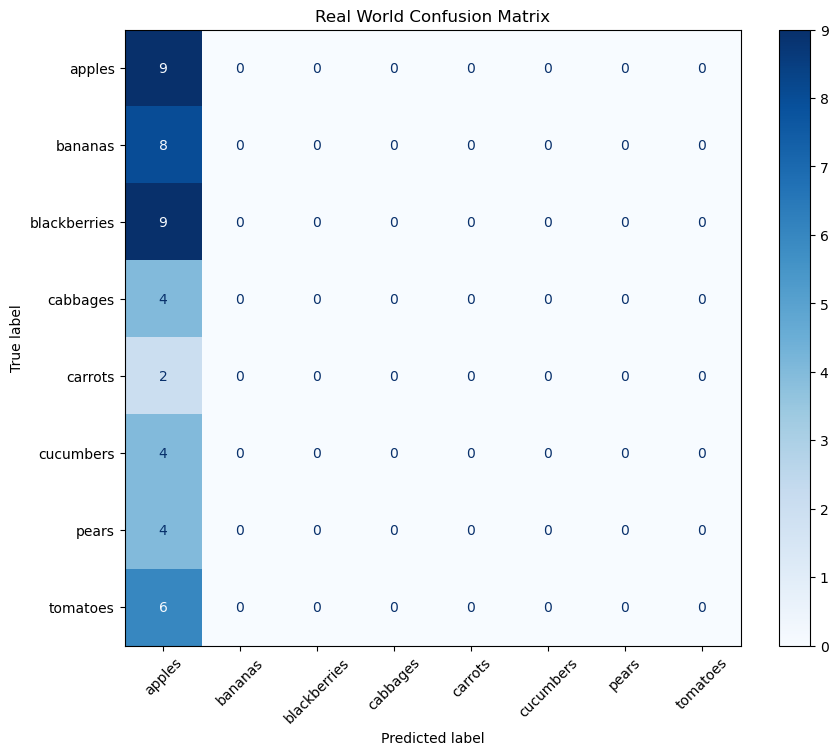

In [171]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf

# General 8 classes
general_classes = ['apples', 'bananas', 'blackberries', 'cabbages', 'carrots', 'cucumbers', 'pears', 'tomatoes']
label_to_index = {label: idx for idx, label in enumerate(general_classes)}

# Tracking
total_images = 0
correct_predictions = 0
y_true = []
y_pred = []

# Loop through test images
for class_folder in os.listdir(test_folder):
    folder_path = os.path.join(test_folder, class_folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            
            if not img_file.lower().endswith(('.jpg', '.jpeg', 'JPG')):
                continue  # skip non-images

            try:
                img = image.load_img(img_path, target_size=img_size)
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                preds = model_self.predict(img_array)
                predicted_class_idx = np.argmax(preds[0])
                predicted_detail = class_names_detail[predicted_class_idx].lower()
                predicted_general = mapping.get(predicted_detail, predicted_detail)

                true_class = class_folder.lower()

                if true_class in label_to_index and predicted_general in label_to_index:
                    y_true.append(label_to_index[true_class])
                    y_pred.append(label_to_index[predicted_general])

                    if predicted_general == true_class:
                        correct_predictions += 1
                    total_images += 1

                print(f"Image: {img_file} | True: {true_class} | Predicted: {predicted_general}")

            except Exception as e:
                print(f"Warning: Could not process {img_file}. Error: {e}")

# accuracy
accuracy = (correct_predictions / total_images) * 100 if total_images > 0 else 0
print("\n--- Final Real World Testing ---")
print(f"Total images tested: {total_images}")
print(f"Correct predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

# classification
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=general_classes, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=general_classes)
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
plt.title("Real World Confusion Matrix")
plt.show()


### Alternatie version : Fine tuning

Since our model keeps predicting 'apple' for many test inputs, we decided to fine tune our model using a train test split with our own images to improve generalization.


The chunk of code is initially generated by ChatGPT, but made neccessary modifications after.

In [191]:
import os
import random
import shutil


random.seed(42)

original_folder = 'self_fruits'
train_folder = 'train_self_fruits'
test_folder = 'test_self_fruits'

for folder in [train_folder, test_folder]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# List class names
class_names = [d for d in os.listdir(original_folder) if os.path.isdir(os.path.join(original_folder, d))]


split_ratio = 0.8  # 80% train, 20% test

for class_name in class_names:
    class_path = os.path.join(original_folder, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    random.shuffle(images)  # same order every time

    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    test_images = images[split_idx:]
    
    # make subfolders per class
    train_class_folder = os.path.join(train_folder, class_name)
    test_class_folder = os.path.join(test_folder, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)
    

    for img_name in train_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(train_class_folder, img_name))
    for img_name in test_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(test_class_folder, img_name))




The chunk of code was adapted from a ChatGPT suggestion, and made neccessary modifications after.

In [188]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf

# Load MobileNetV2 base
base_model = MobileNetV2(input_shape=(224, 224, 3),include_top=False, weights='imagenet')
base_model.trainable = True #fine tuning

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(8, activation='softmax')(x)  # 8 general classes
model_finetuned = Model(inputs=base_model.input, outputs=output)


model_finetuned.compile(
    optimizer=RMSprop(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


train_ds = image_dataset_from_directory(
    "train_self_fruits",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)


train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))

# Fine-tune
history = model_finetuned.fit(
    train_ds,
    epochs=5
)

model_finetuned.save("mobilenetv2_finetuned_realworld_trainself.h5")


Found 34 files belonging to 8 classes.
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.0901 - loss: 2.4179
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.1501 - loss: 2.0566
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.2702 - loss: 1.8604
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.3603 - loss: 1.7227
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.5404 - loss: 1.5125


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

--- Final Real World Testing ---
Total images tested: 12
Correct predictions: 3
Accuracy: 25.00%

Classification Report:
              precision    recall  f1-score   support

      apples       0.00      0.00      0.00         2
     bananas       1.00      0.50      0.67         2
blackberries       0.50      0.50      0.50         2
    cabbages       0.00      0.00      0.00         1
     carrots       0.25      1.00      0.40         1
   cucumbers       0.00      0.00      0.00         1
       pears       0.00      0.00      0.0

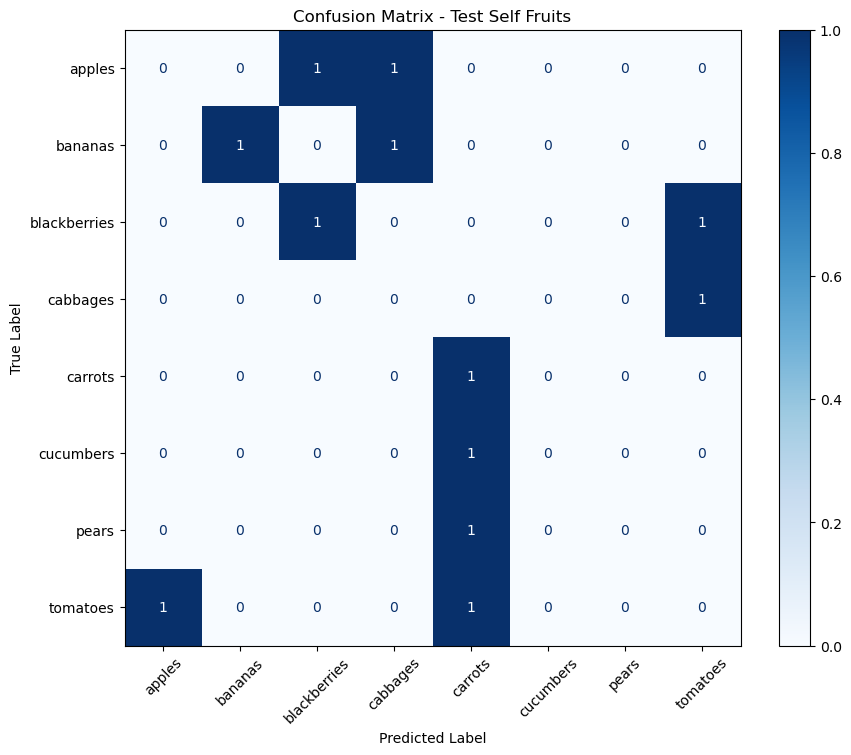

In [190]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf


model_test = load_model("mobilenetv2_finetuned_realworld_trainself.h5")


class_names = ['apples', 'bananas', 'blackberries', 'cabbages', 'carrots', 'cucumbers', 'pears', 'tomatoes']
label_to_index = {label: idx for idx, label in enumerate(class_names)}

img_size = (224, 224)
y_true = []
y_pred = []
total_images = 0
correct_predictions = 0

test_folder = "test_self_fruits"

# Predict
for idx, class_folder in enumerate(sorted(os.listdir(test_folder))):
    folder_path = os.path.join(test_folder, class_folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)

            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            try:
                img = image.load_img(img_path, target_size=img_size)
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

                preds = model_test.predict(img_array)
                predicted_idx = np.argmax(preds[0])

                true_idx = label_to_index[class_folder.lower()]
                y_true.append(true_idx)
                y_pred.append(predicted_idx)

                total_images += 1
                if predicted_idx == true_idx:
                    correct_predictions += 1

            except Exception as e:
                print(f"Error processing {img_file}: {e}")

# Accuracy
accuracy = (correct_predictions / total_images) * 100 if total_images > 0 else 0
print("\n--- Final Real World Testing ---")
print(f"Total images tested: {total_images}")
print(f"Correct predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix - Test Self Fruits")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
